In [22]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.ip

In [36]:
path = r'/home/read1/MasiveData/massive_data_processing_project1/data/interim/temperatures/'                     # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = (pd.read_csv(f) for f in all_files)
df= pd.concat(df_from_each_file, ignore_index=True)
# doesn't create a list, nor does it append to one

In [37]:
df.head()

,sensor,value,time
0,T-DHT11,27.0,2017-12-22T11:22:11Z
1,T-DHT11,28.0,2017-12-22T11:22:16Z
2,T-DHT11,28.0,2017-12-22T11:22:20Z
3,T-DHT11,28.0,2017-12-22T11:22:24Z
4,T-DHT11,28.0,2017-12-22T11:22:28Z


In [38]:
path2 =r'/home/read1/MasiveData/massive_data_processing_project1/data/interim/temperatures/' # use your path
allFiles2 = glob.glob(path + "/*.json")
frame2 = pd.DataFrame()
list_ = []
for file_ in allFiles2:
    ds = pd.read_json(file_,lines=True)
    list_.append(ds)
frame2 = pd.concat(list_)

In [33]:
ds.head()

,sensor,time,value
0,T-HTU21,2017-12-20T12:17:05Z,25.09
1,T-HTU21,2017-12-20T12:17:07Z,25.09
2,T-HTU21,2017-12-20T12:17:09Z,25.09
3,T-HTU21,2017-12-20T12:17:11Z,25.09
4,T-HTU21,2017-12-20T12:17:13Z,25.08


In [51]:
new_data=df.append(ds)

In [60]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10002961 entries, 0 to 1428382
Data columns (total 3 columns):
sensor    object
time      object
value     float64
dtypes: float64(1), object(2)
memory usage: 305.3+ MB


In [ ]:
new_data['sensor'].to_string()

In [41]:
new_data.describe()

,value
count,1.000296e+07
mean,1.620849e+02
std,3.477512e+02
min,1.000000e+00
25%,2.000000e+01
50%,2.300000e+01
75%,3.030000e+01
max,1.039050e+03


In [79]:
import dateutil
#Convert date from string to date times
new_data['time'] = new_data['time'].apply(dateutil.parser.parse, dayfirst=True)

In [80]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10002961 entries, 0 to 1428382
Data columns (total 3 columns):
sensor    object
time      datetime64[ns, UTC]
value     float64
dtypes: datetime64[ns, UTC](1), float64(1), object(1)
memory usage: 625.3+ MB


In [81]:
indexed_df = sorted_df.set_index('time')
indexed_df.head()

,sensor,value
time,,
2017-12-22T10:52:59Z,T-BMP280,26.43
2017-12-22T10:53:02Z,T-BMP280,26.43
2017-12-22T10:53:05Z,T-BMP280,26.44
2017-12-22T10:53:08Z,T-BMP280,26.44
2017-12-22T10:53:11Z,T-BMP280,26.42


In [46]:
new_data['sensor'].count()

10002961

In [47]:
new_data['sensor'].value_counts()

H-DHT22     1440160
T-DHT22     1440150
T-HTU21     1428383
H-HTU21     1428377
T-BMP280    1422795
P-BMP280    1422788
T-DHT11     1420308
Name: sensor, dtype: int64

In [69]:
# Number of non-null unique network entries
new_data['time'].nunique()

5886032

In [71]:
new_data.groupby(['sensor']).groups.keys()

dict_keys(['H-DHT22', 'H-HTU21', 'P-BMP280', 'T-BMP280', 'T-DHT11', 'T-DHT22', 'T-HTU21'])

In [72]:
# Get the first entry for each sensor
new_data.groupby('sensor').first()

,time,value
sensor,,
H-DHT22,2017-12-19T14:07:18Z,15.70
H-HTU21,2017-12-20T12:17:05Z,28.30
P-BMP280,2017-12-22T10:52:59Z,1035.56
T-BMP280,2017-12-22T10:52:59Z,26.43
T-DHT11,2017-12-22T11:22:11Z,27.00
T-DHT22,2017-12-19T14:07:18Z,25.50
T-HTU21,2017-12-20T12:17:05Z,25.09


In [92]:
# Get the sum of the durations per sensor
new_data.groupby('sensor')['value'].sum()

sensor
H-DHT22     1.442149e+06
H-HTU21     4.905101e+07
P-BMP280    1.445112e+09
T-BMP280    3.165488e+07
T-DHT11     3.017836e+07
T-DHT22     3.312325e+07
T-HTU21     3.076715e+07
Name: value, dtype: float64

In [93]:
# Get the number of dates / entries in each sensors
new_data.groupby('sensor')['time'].count()

sensor
H-DHT22     1440160
H-HTU21     1428377
P-BMP280    1422788
T-BMP280    1422795
T-DHT11     1420308
T-DHT22     1440150
T-HTU21     1428383
Name: time, dtype: int64

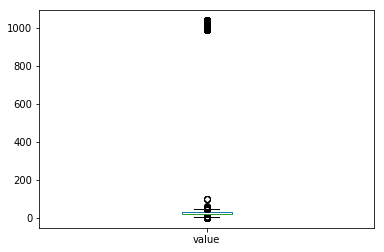

In [105]:
import matplotlib.pyplot as plt
new_data[['value']].plot(kind='box')